Cross-Validation Scores:
[1.  1.  1.  1.  0.9 1.  1.  1.  0.9 1. ]
Mean Accuracy: 0.98

Classification Report:
                   precision    recall  f1-score   support

Ai explainability       1.00      1.00      1.00        50
    Filter bubble       1.00      1.00      1.00        50

         accuracy                           1.00       100
        macro avg       1.00      1.00      1.00       100
     weighted avg       1.00      1.00      1.00       100



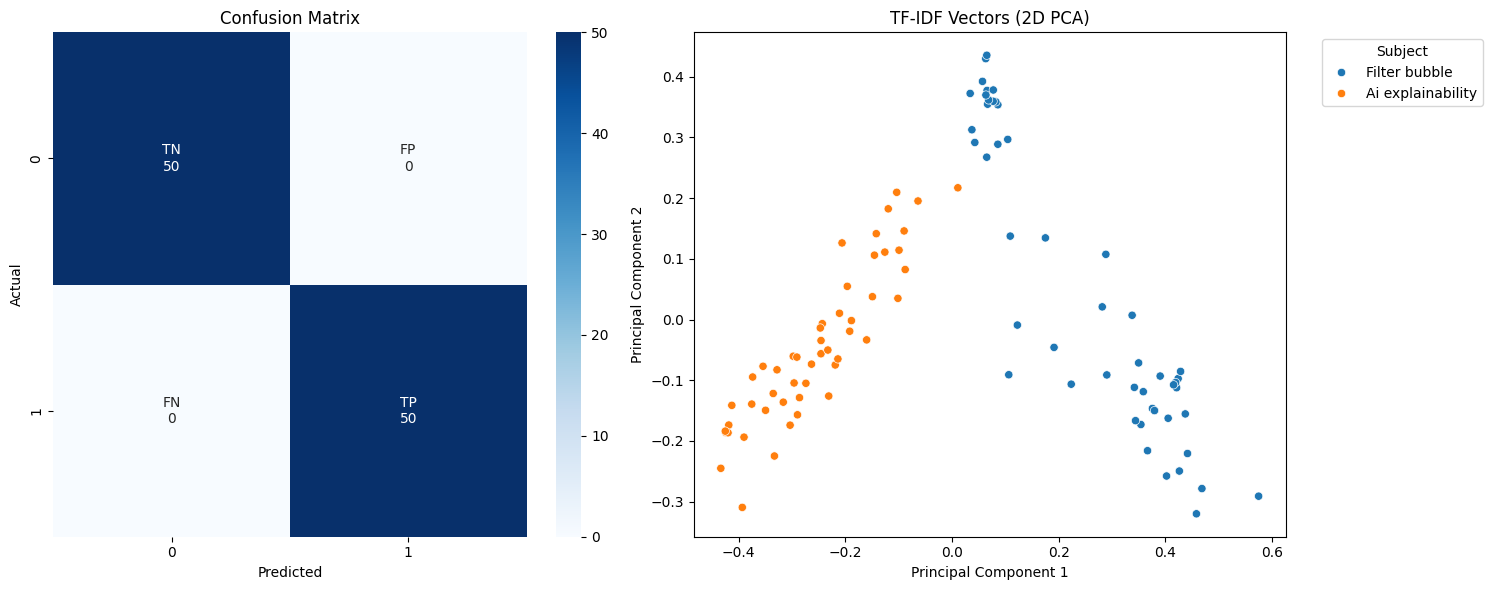

True Positive (TP): 49
True Negative (TN): 50
False Positive (FP): 0
False Negative (FN): 0


In [ ]:
#RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

# Load data
df = pd.read_csv('/content/combined_data.csv')

# Drop NaN values
df.dropna(subset=['txt'], inplace=True)

# Split features and target
X = df['txt'].values
y = df['subject'].values

# Vectorize text data
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectors = tfidf_vectorizer.fit_transform(X)

# Initialize classifier
classifier = RandomForestClassifier()

# Perform 10-fold cross-validation
scores = cross_val_score(classifier, tfidf_vectors, y, cv=10)

# Print cross-validation scores
print("Cross-Validation Scores:")
print(scores)
print(f"Mean Accuracy: {np.mean(scores):.2f}")

# Fit classifier on entire data
classifier.fit(tfidf_vectors, y)

# Make predictions
y_pred = classifier.predict(tfidf_vectors)

# Print classification report
print("\nClassification Report:")
print(classification_report(y, y_pred))

# Plot confusion matrix
cnf_matrix = confusion_matrix(y, y_pred)
group_names = ['TN', 'FP', 'FN', 'TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2, 2)

# Reduce dimensionality for scatter plot
pca = PCA(n_components=2)
tfidf_pca = pca.fit_transform(tfidf_vectors.toarray())

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot confusion matrix
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Create scatter plot
scatter = sns.scatterplot(x=tfidf_pca[:, 0], y=tfidf_pca[:, 1], hue=y, palette='tab10', ax=axes[1])
scatter.legend(title='Subject', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].set_title('TF-IDF Vectors (2D PCA)')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')

plt.tight_layout()
plt.show()



Cross-Validation Scores:
[1.  1.  1.  0.9 1.  1.  1.  0.8 1.  0.9]
Mean Accuracy: 0.96

Classification Report:
                   precision    recall  f1-score   support

Ai explainability       0.93      1.00      0.96        50
    Filter bubble       1.00      0.92      0.96        50

         accuracy                           0.96       100
        macro avg       0.96      0.96      0.96       100
     weighted avg       0.96      0.96      0.96       100



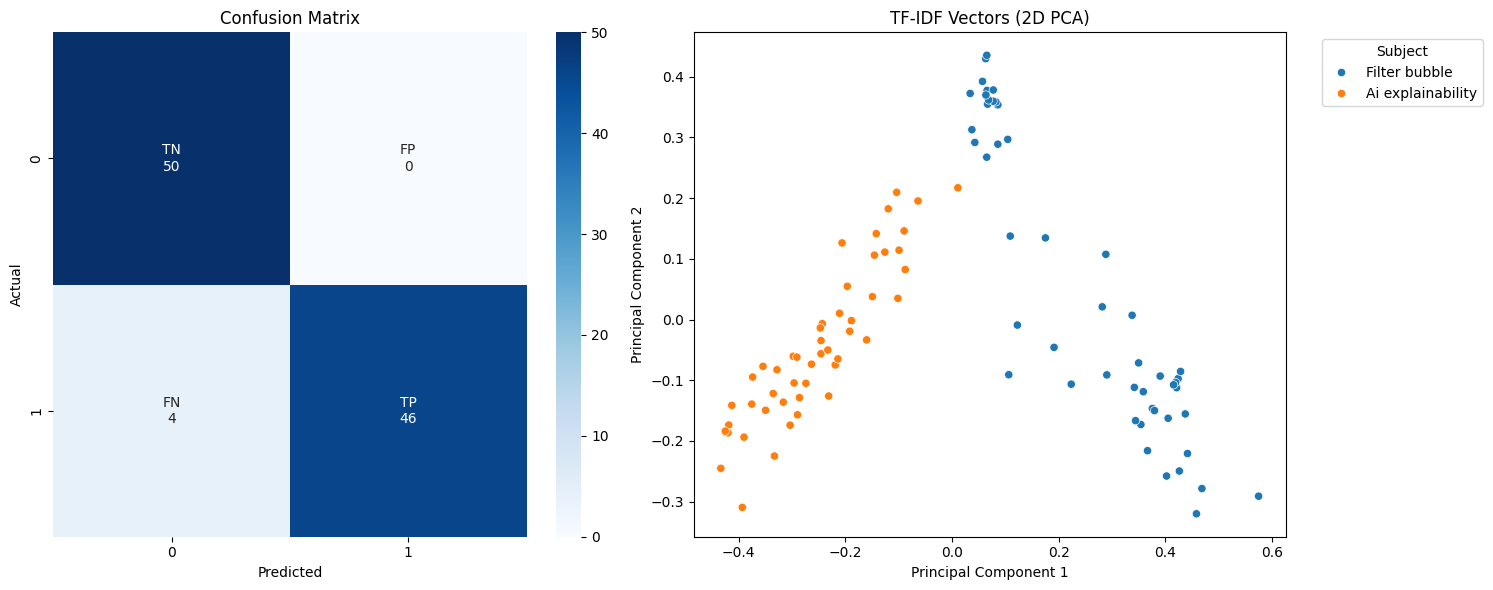

In [ ]:
#k-Nearest Neighbors (KNN)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

# Load data
df = pd.read_csv('/content/combined_data.csv')

# Drop NaN values
df.dropna(subset=['txt'], inplace=True)

# Split features and target
X = df['txt'].values
y = df['subject'].values

# Vectorize text data
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectors = tfidf_vectorizer.fit_transform(X)

# Initialize classifier
classifier = KNeighborsClassifier()

# Perform 10-fold cross-validation
scores = cross_val_score(classifier, tfidf_vectors, y, cv=10)

# Print cross-validation scores
print("Cross-Validation Scores:")
print(scores)
print(f"Mean Accuracy: {np.mean(scores):.2f}")

# Fit classifier on entire data
classifier.fit(tfidf_vectors, y)

# Make predictions
y_pred = classifier.predict(tfidf_vectors)

# Print classification report
print("\nClassification Report:")
print(classification_report(y, y_pred))

# Plot confusion matrix
cnf_matrix = confusion_matrix(y, y_pred)
group_names = ['TN', 'FP', 'FN', 'TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2, 2)

# Reduce dimensionality for scatter plot
pca = PCA(n_components=2)
tfidf_pca = pca.fit_transform(tfidf_vectors.toarray())

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot confusion matrix
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Create scatter plot
scatter = sns.scatterplot(x=tfidf_pca[:, 0], y=tfidf_pca[:, 1], hue=y, palette='tab10', ax=axes[1])
scatter.legend(title='Subject', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].set_title('TF-IDF Vectors (2D PCA)')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


Cross-Validation Scores:
[1.  1.  1.  1.  0.9 0.9 1.  0.9 1.  0.9]
Mean Accuracy: 0.96

Classification Report:
                   precision    recall  f1-score   support

Ai explainability       1.00      1.00      1.00        50
    Filter bubble       1.00      1.00      1.00        50

         accuracy                           1.00       100
        macro avg       1.00      1.00      1.00       100
     weighted avg       1.00      1.00      1.00       100



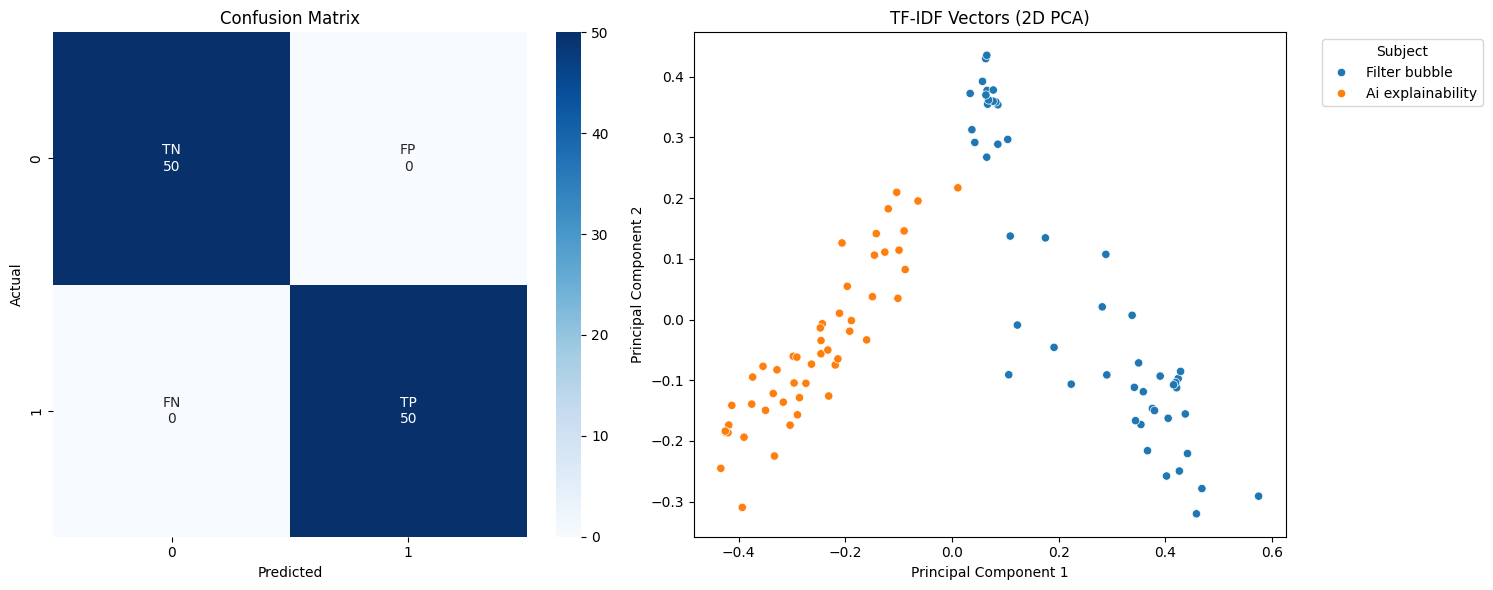

In [ ]:
#MultinomialNB
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

# Load data
df = pd.read_csv('/content/combined_data.csv')

# Drop NaN values
df.dropna(subset=['txt'], inplace=True)

# Split features and target
X = df['txt'].values
y = df['subject'].values

# Vectorize text data
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectors = tfidf_vectorizer.fit_transform(X)

# Initialize classifier
classifier = MultinomialNB()

# Perform 10-fold cross-validation
scores = cross_val_score(classifier, tfidf_vectors, y, cv=10)

# Print cross-validation scores
print("Cross-Validation Scores:")
print(scores)
print(f"Mean Accuracy: {np.mean(scores):.2f}")

# Fit classifier on entire data
classifier.fit(tfidf_vectors, y)

# Make predictions
y_pred = classifier.predict(tfidf_vectors)

# Print classification report
print("\nClassification Report:")
print(classification_report(y, y_pred))

# Plot confusion matrix
cnf_matrix = confusion_matrix(y, y_pred)
group_names = ['TN', 'FP', 'FN', 'TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2, 2)

# Reduce dimensionality for scatter plot
pca = PCA(n_components=2)
tfidf_pca = pca.fit_transform(tfidf_vectors.toarray())

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot confusion matrix
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Create scatter plot
scatter = sns.scatterplot(x=tfidf_pca[:, 0], y=tfidf_pca[:, 1], hue=y, palette='tab10', ax=axes[1])
scatter.legend(title='Subject', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].set_title('TF-IDF Vectors (2D PCA)')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


Cross-Validation Scores:
[0.9 0.8 0.8 1.  1.  0.9 0.9 1.  0.9 0.6]
Mean Accuracy: 0.88

Classification Report:
                   precision    recall  f1-score   support

Ai explainability       1.00      1.00      1.00        50
    Filter bubble       1.00      1.00      1.00        50

         accuracy                           1.00       100
        macro avg       1.00      1.00      1.00       100
     weighted avg       1.00      1.00      1.00       100



<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

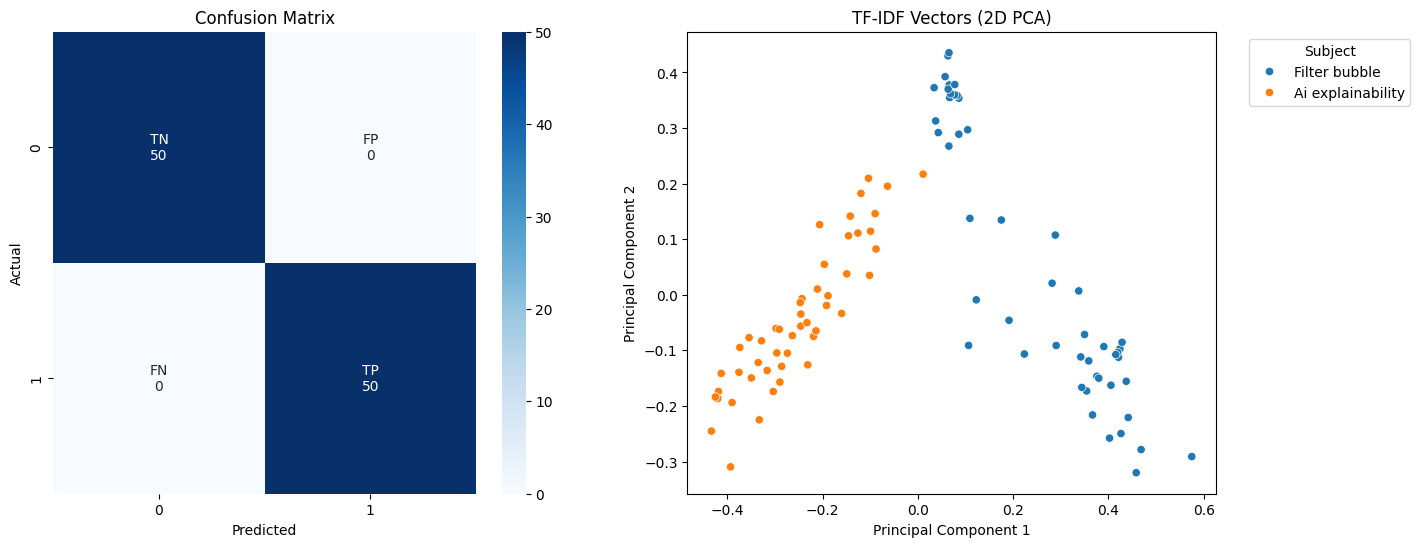

In [ ]:
#GaussianNB
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB  # Import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

# Load data
df = pd.read_csv('/content/combined_data.csv')

# Drop NaN values
df.dropna(subset=['txt'], inplace=True)

# Split features and target
X = df['txt'].values
y = df['subject'].values

# Vectorize text data
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectors = tfidf_vectorizer.fit_transform(X)

# Initialize classifier - Use GaussianNB instead of MultinomialNB
classifier = GaussianNB()

# Perform 10-fold cross-validation
scores = cross_val_score(classifier, tfidf_vectors.toarray(), y, cv=10)

# Print cross-validation scores
print("Cross-Validation Scores:")
print(scores)
print(f"Mean Accuracy: {np.mean(scores):.2f}")

# Fit classifier on entire data
classifier.fit(tfidf_vectors.toarray(), y)

# Make predictions
y_pred = classifier.predict(tfidf_vectors.toarray())

# Print classification report
print("\nClassification Report:")
print(classification_report(y, y_pred))

# Plot confusion matrix
cnf_matrix = confusion_matrix(y, y_pred)
group_names = ['TN', 'FP', 'FN', 'TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2, 2)

# Reduce dimensionality for scatter plot
pca = PCA(n_components=2)
tfidf_pca = pca.fit_transform(tfidf_vectors.toarray())

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot confusion matrix
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Create scatter plot
scatter = sns.scatterplot(x=tfidf_pca[:, 0], y=tfidf_pca[:, 1], hue=y, palette='tab10', ax=axes[1])
scatter.legend(title='Subject', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].set_title('TF-IDF Vectors (2D PCA)')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')

plt.tight_layout
